# **Data Visualization Lab**


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
file = 'm4_survey_data.sqlite'
import urllib.request
urllib.request.urlretrieve(url, file)

('m4_survey_data.sqlite', <http.client.HTTPMessage at 0x12e017cbe90>)

Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*) FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [5]:
df = pd.read_sql(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [18]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0]) 
#print(df.iloc[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [14]:
df

,sql
0,"CREATE TABLE ""master"" (\n""index"" INTEGER,\n ""..."


In [45]:
QUERY = """
SELECT * FROM master
"""
df_master = pd.read_sql_query(QUERY,conn)
df_master.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


# Hands-on Lab


## Visualizing distribution of data


In [3]:
import seaborn as sns
import plotly.express as px

### Histograms


Plot a histogram of `ConvertedComp.`


In [4]:
QUERY = """
SELECT ConvertedComp FROM master
"""
df_cc = pd.read_sql_query(QUERY, conn)

<Axes: ylabel='Count'>

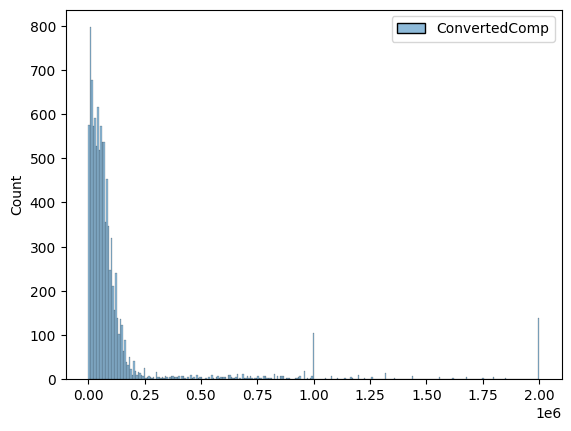

In [29]:
sns.histplot(df_cc)

### Box Plots


Plot a box plot of `Age.`


<Axes: >

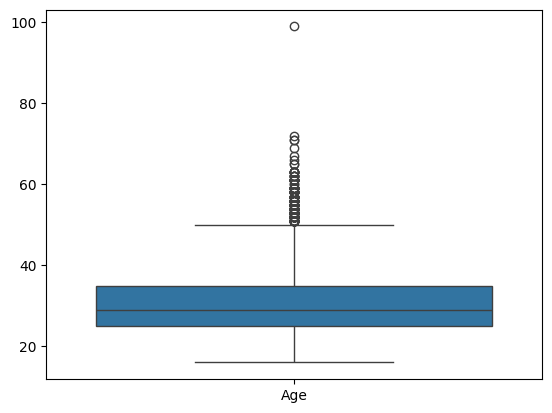

In [30]:
QUERY = """
SELECT Age FROM master
"""
df_age = pd.read_sql_query(QUERY, conn)

sns.boxplot(df_age)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [35]:
QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""
df_sp = pd.read_sql_query(QUERY, conn)

<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

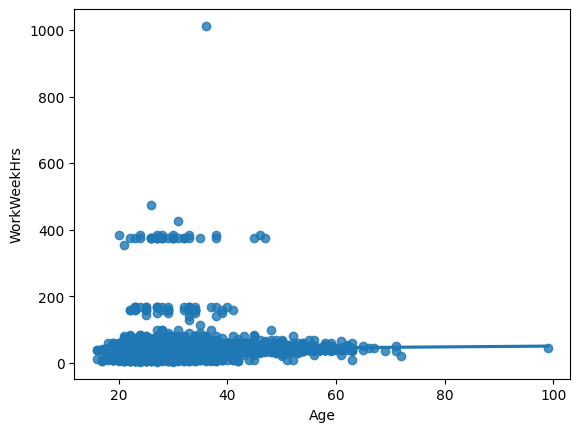

In [36]:
sns.regplot(x='Age', y='WorkWeekHrs', data=df_sp)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [39]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
"""
df_bubble = pd.read_sql_query(QUERY, conn)


In [42]:
df_bubble = df_bubble.dropna()

In [43]:
px.scatter(df_bubble, x="WorkWeekHrs", y="CodeRevHrs", size="Age", title='Young coders time')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [46]:
QUERY = """
SELECT DatabaseDesireNextYear FROM DatabaseDesireNextYear
"""
df_dbny = pd.read_sql_query(QUERY,conn)

In [47]:
df_dbny = df_dbny.value_counts().to_frame().reset_index()
df_dbny

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


In [49]:
df_dbny['count'].astype('int')

0     4328
1     3649
2     3331
3     3281
4     2856
5     2706
6     2437
7     1650
8     1385
9     1044
10    1003
11     870
12     645
13     390
Name: count, dtype: int32

In [69]:
df_top = df_dbny.head(5)
df_top

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


In [61]:
df_dbny.loc[5:,'count'].sum()

12130

In [70]:
new_row = {"DatabaseDesireNextYear":'Others', 'count':12130}
df_top = pd.concat([df_top, pd.DataFrame([new_row])], ignore_index=True)
df_top


,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Others,12130


In [113]:
px.pie(df_dbny.head(5), values='count', names="DatabaseDesireNextYear", title='Top DBs')

In [115]:
QUERY = """
SELECT LanguageDesireNextYear FROM LanguageDesireNextYear
"""
df_python = pd.read_sql_query(QUERY,conn)
df_python.value_counts()

LanguageDesireNextYear
JavaScript                6630
HTML/CSS                  5328
Python                    5239
SQL                       5012
TypeScript                4088
C#                        3591
Bash/Shell/PowerShell     3097
Java                      2953
Go                        2759
Kotlin                    1890
C++                       1633
Rust                      1520
PHP                       1457
WebAssembly               1397
Swift                     1179
Ruby                      1029
C                         1028
Scala                      879
R                          850
Other(s):                  836
F#                         621
Elixir                     620
Dart                       610
Clojure                    413
Assembly                   336
Objective-C                310
Erlang                     310
VBA                        149
Name: count, dtype: int64

In [118]:
QUERY = """
SELECT LanguageWorkedWith FROM LanguageWorkedWith
"""
df_sql = pd.read_sql_query(QUERY,conn)
df_sql.value_counts()

LanguageWorkedWith   
JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
C                        1578
Ruby                     1149
Go                       1114
Other(s):                 840
Kotlin                    751
Swift                     707
VBA                       628
R                         585
Objective-C               518
Scala                     492
Assembly                  437
Rust                      324
Dart                      237
Elixir                    187
Clojure                   164
F#                        158
WebAssembly               133
Erlang                     98
Name: count, dtype: int64

In [145]:
QUERY = """
SELECT * FROM DatabaseWorkedWith 
"""
df_db = pd.read_sql_query(QUERY,conn)
df_db.head()

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite


In [151]:
df_mysql_only = df_db.groupby('Respondent').sum()['DatabaseWorkedWith']=='MySQL'
df_mysql_only.value_counts()

DatabaseWorkedWith
False    10471
True       474
Name: count, dtype: int64

In [155]:
QUERY = """
SELECT * FROM DevType 
"""
df_devtype = pd.read_sql_query(QUERY,conn)
df_devtype['DevType'].value_counts()

DevType
Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or g

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [74]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
WHERE Age BETWEEN 30 and 35
"""
df_sb = pd.read_sql_query(QUERY,conn)
df_sb.head()


,WorkWeekHrs,CodeRevHrs,Age
0,8.0,3.0,31.0
1,40.0,2.0,34.0
2,40.0,2.0,32.0
3,42.0,15.0,34.0
4,40.0,2.0,33.0


In [92]:
df_sbage = df_sb.groupby('Age').median()
df_sbage

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


In [93]:
px.bar(df_sbage, x=df_sbage.index, y=["WorkWeekHrs","CodeRevHrs"], title='Stacked Bar Chart')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [94]:
QUERY = """
SELECT ConvertedComp,Age FROM master WHERE Age Between 45 and 60 
"""
df_ccm = pd.read_sql_query(QUERY, conn)
df_ccm.head()


,ConvertedComp,Age
0,103000.0,47.0
1,NaN,54.0
2,54996.0,47.0
3,62807.0,47.0
4,72522.0,45.0


In [97]:
df_linemed = df_ccm.groupby('Age').median()
df_linemed.head()

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0


In [98]:
px.line(df_linemed, x=df_linemed.index, y='ConvertedComp', title='Line Median Age Salary')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [99]:
QUERY = """
SELECT MainBranch FROM master 
"""
df_mb = pd.read_sql_query(QUERY, conn)
df_mb.head()


,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession


In [110]:
df_mb.value_counts()

MainBranch                                                                   
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: count, dtype: int64

In [112]:
px.bar(df_mb, y='MainBranch', title='Who are you')

Close the database connection.


In [ ]:
conn.close()

<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
